In [1]:
import tensorflow as tf

import numpy as np
import matplotlib.pyplot as plt

tf.__version__

'2.8.2'

# Dataset Load

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


# Dataset Check

In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [4]:
train_images.shape, train_labels.shape

((60000, 28, 28), (60000,))

In [5]:
test_images.shape, test_labels.shape

((10000, 28, 28), (10000,))

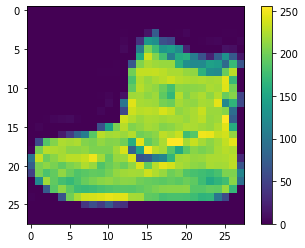

In [6]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [7]:
train_images = train_images / 255.0
test_images = test_images / 255.0

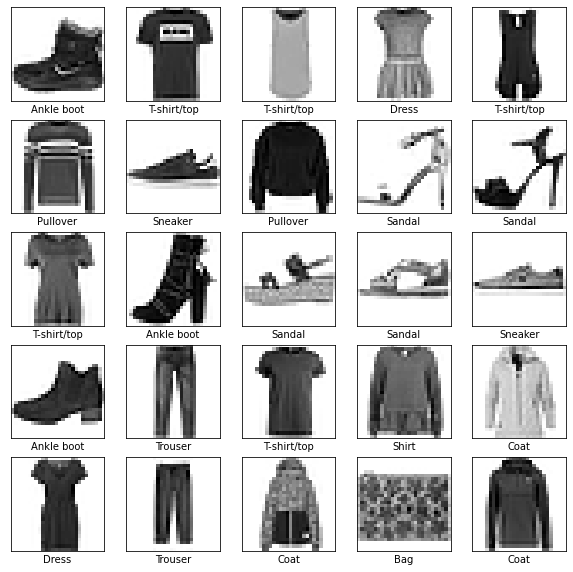

In [8]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])

plt.show()

# Model

In [9]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [10]:
# optimizer, loss, metric은 모델 컴파일 단계에서 추가된다.
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Training

In [11]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 7s 2ms/step - loss: 0.5015 - accuracy: 0.8232
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3779 - accuracy: 0.8635
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3393 - accuracy: 0.8766
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3145 - accuracy: 0.8844
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2941 - accuracy: 0.8909
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2797 - accuracy: 0.8973
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2679 - accuracy: 0.9005
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2547 - accuracy: 0.9049
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2486 - accuracy: 0.9065
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.237

# Evaluation

In [12]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

print("\nTest accuracy:", test_acc)

313/313 - 1s - loss: 0.3316 - accuracy: 0.8845 - 715ms/epoch - 2ms/step

Test accuracy: 0.8845000267028809


# Inference

In [13]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])

In [14]:
predictions = probability_model.predict(test_images)

In [15]:
predictions[0]

array([1.5297040e-07, 1.9621308e-07, 3.9342666e-08, 4.1942703e-09,
       1.2291534e-06, 3.0820516e-03, 2.4126658e-07, 3.8512805e-03,
       7.2835803e-08, 9.9306470e-01], dtype=float32)

In [16]:
np.argmax(predictions[0])

9

In [17]:
test_labels[0]

9

# Visualization

In [18]:
def plot_image(i, predictions_array, true_label, img):
    true_label, img = true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label], 
                                                     100*np.max(predictions_array),
                                                     class_names[true_label]),
                                                     color=color)

In [19]:
def plot_value_array(i, predictions_array, true_label):
    true_label =true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt. bar(range(10), predictions_array, color='#777777')
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

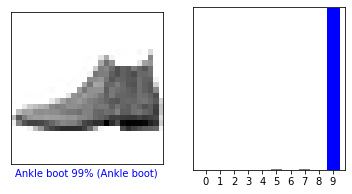

In [21]:
# class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

i = 0
plt.figure(figsize=(6, 3))
plt.subplot(1, 2, 1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1, 2, 2)
plot_value_array(i, predictions[i], test_labels)
plt.show()

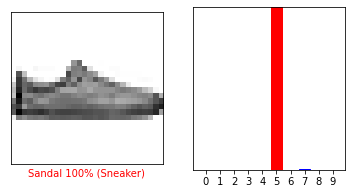

In [22]:
# 신뢰도가 높아도 틀릴 수 있음.

i = 12
plt.figure(figsize=(6, 3))
plt.subplot(1, 2, 1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1, 2, 2)
plot_value_array(i, predictions[i], test_labels)
plt.show()

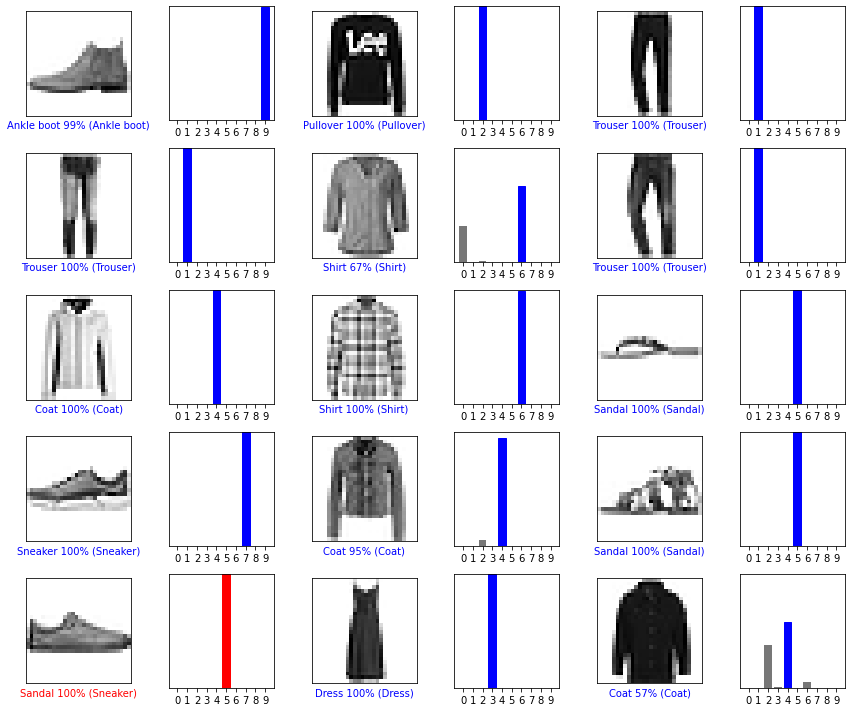

In [25]:
num_rows = 5
num_cols = 3
num_images = num_rows * num_cols

plt.figure(figsize=(2*2*num_cols, 2*num_rows))

for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions[i], test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions[i], test_labels)

plt.tight_layout()
plt.show()

# Test

In [26]:
img = test_images[1]

print(img.shape)

(28, 28)


In [27]:
img = (np.expand_dims(img, 0))

print(img.shape)

(1, 28, 28)


In [28]:
predictions_single = probability_model.predict(img)

print(predictions_single)

[[1.15618141e-05 4.12014232e-15 9.99437392e-01 7.26462090e-09
  4.79504874e-04 3.77441025e-17 7.15407441e-05 7.25950094e-19
  1.26115820e-08 1.01213024e-13]]


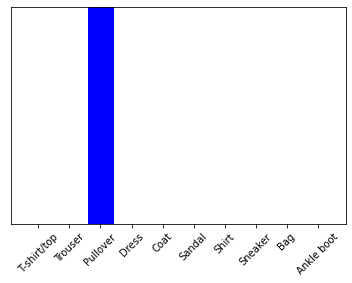

In [33]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

In [34]:
np.argmax(predictions_single[0])

2